In [ ]:
#version for all tissues not just pdgfb2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tifffile import tifffile as tiff
import pandas as pd
from itertools import zip_longest

print("running")
loc = ("D:\\MN_tissue_project\\A_MN_figures\\processed_images\\")


nras = np.array(tiff.imread(f'{loc}NaN_ovldrmd_ccv_nras_both_refit_average_correct_binnedmeanmap.tif'),dtype=float)
pdgfb2 = np.array(tiff.imread(f'{loc}cropped_pdgfb2\\NaN_ovldrmd_ccv_pdgfb_take2_average_correct_binnedmeanmap_crop.tif'),dtype=float)
pdgfb3 =  np.array(tiff.imread(f'{loc}NaN_ovldrmd_ccv_pdgfb_take3_average_correct_binnedmeanmap.tif'),dtype=float)

data = {'NRAS': nras[nras>0],
        'PDGFb1': pdgfb2[pdgfb2>0],
        'PDGFb2': pdgfb3[pdgfb3>0]}
#TODO switch to numpypad 
zipped_data = (zip_longest(*data.values(), fillvalue=np.nan))


df = pd.DataFrame(zipped_data, columns=['NRAS', 'PDGFb1','PDGFb2'])
#boxplot = df.boxplot(grid=False, fontsize=15)


running


AttributeError: 'DataFrame' object has no attribute 'nras'

In [3]:
print(df.NRAS)

0            602.891683
1            603.962928
2            618.097188
3            634.844885
4            652.829785
               ...     
99721565     687.298777
99721566     687.791713
99721567     693.913846
99721568     788.860674
99721569    1186.510010
Name: NRAS, Length: 99721570, dtype: float64


                 NRAS      PDGFb1       PDGFb2
0          602.891683  679.507019  1441.530029
1          603.962928  500.101501  1300.011989
2          618.097188  391.435333  1326.008256
3          634.844885  391.435333  1339.866155
4          652.829785  391.435333  1341.794891
...               ...         ...          ...
99721565   687.298777         NaN          NaN
99721566   687.791713         NaN          NaN
99721567   693.913846         NaN          NaN
99721568   788.860674         NaN          NaN
99721569  1186.510010         NaN          NaN

[99721570 rows x 3 columns]


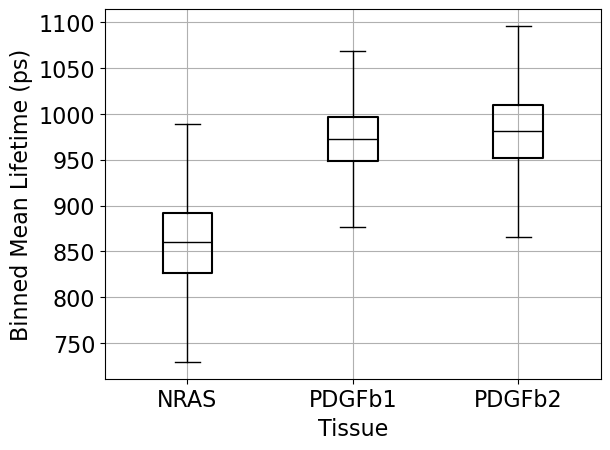

In [5]:
print(df)
#plt.boxplot([df.mid,df.cortex,df.cerebellum],tick_labels=['mid', 'cortex','cerebellum'], showfliers=False)
df.plot(kind='box',color=dict(boxes='black', whiskers='black', medians='black', caps='black'),showfliers=False,boxprops=dict(linestyle='-', linewidth=1.5),fontsize=16,grid=True)
plt.xlabel('Tissue',fontsize = 16)
plt.ylabel('Binned Mean Lifetime (ps)',fontsize=16)
plt.show()